<a href="https://colab.research.google.com/github/smm-0216/MLOps-tools/blob/main/PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pycaret

In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data

In [ ]:
data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
setup_pycaret = setup(
    data=data,
    target='Disease',
    preprocess=False
)

,Description,Value
0,Session id,8428
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(270, 14)"
4,Transformed data shape,"(270, 14)"
5,Transformed train set shape,"(189, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13


In [ ]:
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8842,0.9373,0.8389,0.9046,0.8627,0.7645,0.7761,0.3850
ridge,Ridge Classifier,0.8787,0.9384,0.8611,0.8755,0.8619,0.7547,0.7641,0.0330
lda,Linear Discriminant Analysis,0.8787,0.9384,0.8611,0.8755,0.8619,0.7547,0.7641,0.0550
nb,Naive Bayes,0.8465,0.9323,0.8167,0.8579,0.8227,0.6898,0.7072,0.0560
rf,Random Forest Classifier,0.8465,0.9322,0.8042,0.8676,0.8186,0.6889,0.7082,0.1980
xgboost,Extreme Gradient Boosting,0.8418,0.9144,0.8028,0.8630,0.8139,0.6794,0.7028,0.0690
qda,Quadratic Discriminant Analysis,0.8415,0.8897,0.8389,0.8380,0.8227,0.6817,0.7019,0.0320
gbc,Gradient Boosting Classifier,0.8415,0.9119,0.7903,0.8674,0.8129,0.6782,0.6976,0.2370
lightgbm,Light Gradient Boosting Machine,0.8412,0.9291,0.8278,0.8393,0.8203,0.6809,0.6974,0.1290
et,Extra Trees Classifier,0.8360,0.9257,0.7917,0.8390,0.8058,0.6670,0.6769,0.1810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6128, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# best_model = create_model('rf')
tuned_model = tune_model(best_model, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9659,0.8750,1.0000,0.9333,0.8902,0.8956
1,0.8947,0.9091,1.0000,0.8000,0.8889,0.7912,0.8090
2,0.8947,1.0000,1.0000,0.8000,0.8889,0.7912,0.8090
3,0.7895,0.9545,0.7500,0.7500,0.7500,0.5682,0.5682
4,0.8947,0.9773,0.8750,0.8750,0.8750,0.7841,0.7841
5,0.7895,0.9000,0.6667,0.8571,0.7500,0.5730,0.5866
6,0.9474,0.9556,0.8889,1.0000,0.9412,0.8939,0.8989
7,0.7895,0.8000,0.6667,0.8571,0.7500,0.5730,0.5866
8,0.7895,0.9333,0.6667,0.8571,0.7500,0.5730,0.5866


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


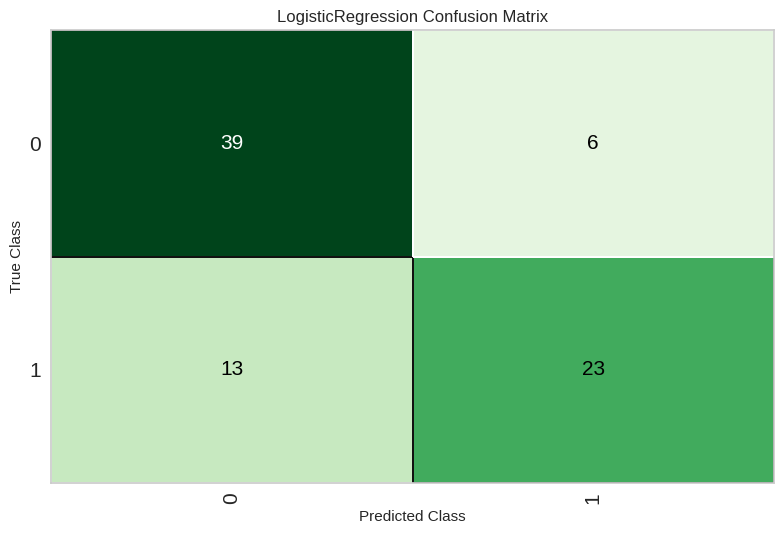

In [ ]:
plot_model(tuned_model, plot='confusion_matrix')

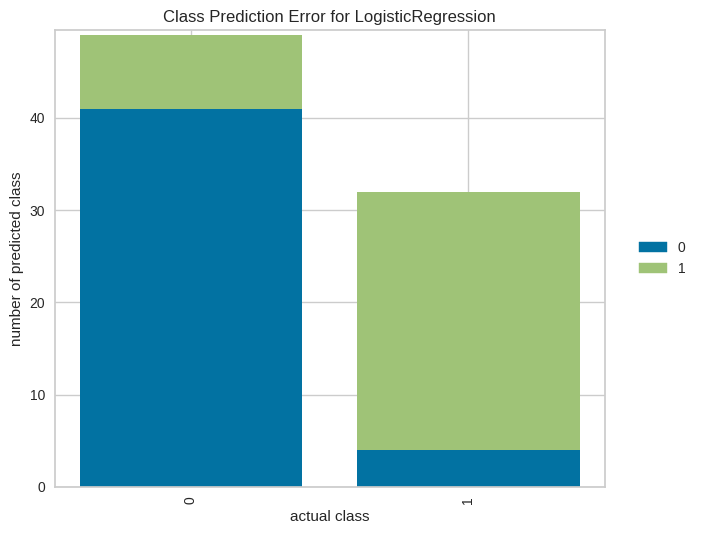

In [ ]:
plot_model(tuned_model, plot='error')

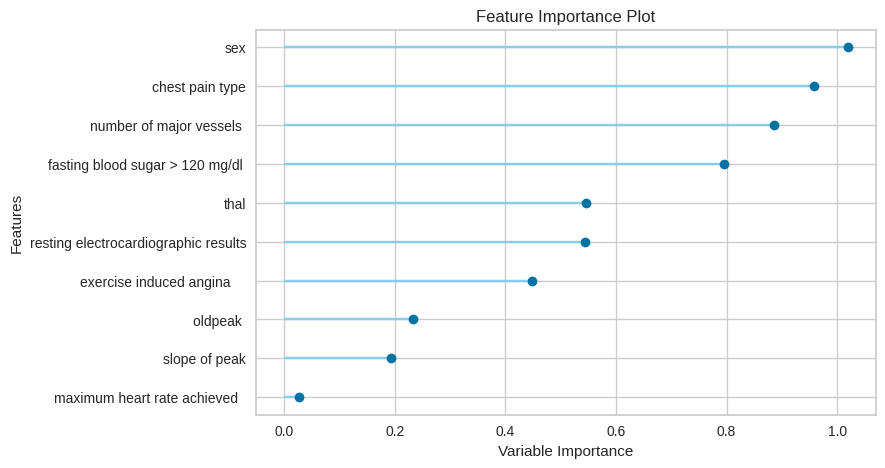

In [ ]:
plot_model(tuned_model, plot='feature')

In [ ]:
final_model = finalize_model(tuned_model) # esto entrena el modelo con todos los datos
save_model(final_model, 'heart_disease_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'chest pain type',
                                              'resting blood pressure',
                                              'serum cholestoral in mg/dl      ',
                                              'fasting blood sugar > 120 mg/dl ',
                                              'resting electrocardiographic '
                                              'results',
                                              'maximum heart rate achieved  ',
                                              'exercise induced angina    ',
                                              'oldpeak ', 'slope of peak',
                                              'number of major vessels ',...
                  TransformerWrapper(exclude=None, include=None,
                                     transforme

In [ ]:
loaded_model = load_model('heart_disease_model_pipeline')
new_data = data.sample(5)
predictions = predict_model(loaded_model, data=new_data)
print(predictions.prediction_label)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6000,0.8333,0.5000,0.5000,0.5000,0.1667,0.1667


250    1
128    0
12     0
210    0
184    1
Name: prediction_label, dtype: int64
